# Análise de Correlação entre Desemprego e Criminalidade em Capitais Europeias

Neste projeto, vamos investigar se existe uma correlação entre as taxas de desemprego e os índices de criminalidade urbana nas principais capitais da Europa.

---

## Etapas desta análise:

1. Importação de bibliotecas e configuração do ambiente
2. Carregamento dos datasets
3. Exploração inicial dos dados
4. Integração das tabelas
5. Análise descritiva e visualizações
6. Análise de correlação


In [12]:
# 1. Importação de bibliotecas
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style="whitegrid")

path1 = kagglehub.dataset_download("gpreda/unemployment-in-european-union")
print("Arquivos salvos em:", path1)

path2 = kagglehub.dataset_download("arnewo/crime-in-europe")
print("Arquivos salvos em:", path2)


print("Arquivos em path1:")
print(os.listdir(path1))

print("\nArquivos em path2:")
print(os.listdir(path2))

Arquivos salvos em: /home/ptrck/.cache/kagglehub/datasets/gpreda/unemployment-in-european-union/versions/4
Arquivos salvos em: /home/ptrck/.cache/kagglehub/datasets/arnewo/crime-in-europe/versions/1
Arquivos em path1:
['une_rt_m.tsv']

Arquivos em path2:
['CRIM_GEN_REG.csv', 'UNIT.csv', 'ICCS.csv']


# 2. Carregamento dos Dados

Referencia dos dados:
- Taxa de desemprego por capital europeia
- Índice de criminalidade urbana nas mesmas capitais

In [13]:
# Leitura do arquivo CSV
csv_path1 = path1 + "/une_rt_m.tsv"
df_unemp = pd.read_csv(csv_path1, sep="\t")

csv_path2 = path2 + "/CRIM_GEN_REG.csv"
df_crime = pd.read_csv(csv_path2)

# Visualização
df_unemp.head()
df_crime.head()


,geo,unit,freq,iccs,TIME_PERIOD,value
0,AL,NR,A,ICCS0101,2008,88.0
1,AL,NR,A,ICCS0101,2009,82.0
2,AL,NR,A,ICCS0101,2010,118.0
3,AL,NR,A,ICCS0101,2011,124.0
4,AL,NR,A,ICCS0101,2012,126.0


In [15]:
try:
    df_unemp = pd.read_csv(csv_path1, sep="\t")
    df_crime = pd.read_csv(csv_path2)
except FileNotFoundError:
    print("Erro: Verifique se os arquivos CSV estão no mesmo diretório do notebook.")

# 3. Exploração Inicial

Vamos visualizar as primeiras entradas de cada dataset e entender sua estrutura.


In [20]:
# Visualização inicial
print("Desemprego:")
display(df_unemp.head())

print("\nCriminalidade:")
display(df_crime.head())

# Estrutura
df_unemp.info()
df_crime.info()
print(df_unemp.columns.tolist())


Desemprego:


,"s_adj,age,unit,sex,geo\time",2020M07,2020M06,2020M05,2020M04,2020M03,2020M02,2020M01,2019M12,2019M11,...,1983M10,1983M09,1983M08,1983M07,1983M06,1983M05,1983M04,1983M03,1983M02,1983M01
0,"NSA,TOTAL,PC_ACT,F,AT",6.0,6.2,5.2,4.9,4.7,4.1,4.4,4.0,3.9,...,:,:,:,:,:,:,:,:,:,:
1,"NSA,TOTAL,PC_ACT,F,BE",5.4,5.0,5.0,5.2,5.0,4.9,4.8,4.6,4.5,...,:,:,:,:,:,:,:,:,:,:
2,"NSA,TOTAL,PC_ACT,F,BG",3.9,3.9,4.2,4.7,4.1,4.2,4.3,3.9,3.8,...,:,:,:,:,:,:,:,:,:,:
3,"NSA,TOTAL,PC_ACT,F,CH",:,4.4,4.3,4.4,4.6,4.6,4.5,4.1,4.0,...,:,:,:,:,:,:,:,:,:,:
4,"NSA,TOTAL,PC_ACT,F,CY",7.2,6.6,6.4,6.8,7.1,7.5,7.9,7.5,7.7,...,:,:,:,:,:,:,:,:,:,:



Criminalidade:


,CountryCode,unit,freq,iccs,Year,CrimeIndex
0,AL,NR,A,ICCS0101,2008,88.0
1,AL,NR,A,ICCS0101,2009,82.0
2,AL,NR,A,ICCS0101,2010,118.0
3,AL,NR,A,ICCS0101,2011,124.0
4,AL,NR,A,ICCS0101,2012,126.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2131 entries, 0 to 2130
Columns: 452 entries, s_adj,age,unit,sex,geo\time to 1983M01 
dtypes: object(452)
memory usage: 7.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216947 entries, 0 to 216946
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  216947 non-null  object 
 1   unit         216947 non-null  object 
 2   freq         216947 non-null  object 
 3   iccs         216947 non-null  object 
 4   Year         216947 non-null  int64  
 5   CrimeIndex   216947 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB
['s_adj,age,unit,sex,geo\\time', '2020M07 ', '2020M06 ', '2020M05 ', '2020M04 ', '2020M03 ', '2020M02 ', '2020M01 ', '2019M12 ', '2019M11 ', '2019M10 ', '2019M09 ', '2019M08 ', '2019M07 ', '2019M06 ', '2019M05 ', '2019M04 ', '2019M03 ', '2019M02 ', '2019M01 ', '2018M12 ', '2018M11 ', '2018M10 ', '2018M09 

# 4. Integração dos Dados

Vamos unir os dois datasets pela cidade e ano, mantendo apenas os dados compatíveis.


In [24]:
# Separar a coluna 's_adj,age,unit,sex,geo\\time' em múltiplas colunas
df_unemp_split = df_unemp.copy()
df_unemp_split[['s_adj', 'age', 'unit', 'sex', 'CountryCode']] = df_unemp_split['s_adj,age,unit,sex,geo\\time'].str.split(',', expand=True)

# Converter colunas de ano/mês para duas colunas: 'YearMonth' e 'UnemploymentRate'
df_unemp_long = df_unemp_split.melt(
    id_vars=['CountryCode', 's_adj', 'age', 'unit', 'sex'],
    var_name='YearMonth',
    value_name='UnemploymentRate'
)

# Limpar espaços
df_unemp_long['YearMonth'] = df_unemp_long['YearMonth'].str.strip()

# Remover linhas onde o valor de 'YearMonth' não começa com 4 dígitos numéricos
df_unemp_long = df_unemp_long[df_unemp_long['YearMonth'].str.match(r'^\d{4}M\d{2}$', na=False)]

# Agora sim: extrair o ano
df_unemp_long['Year'] = df_unemp_long['YearMonth'].str[:4].astype(int)

df_crime_grouped = df_crime.groupby(['CountryCode', 'Year'], as_index=False)['CrimeIndex'].mean()

# Mesclando as tabelas (ajuste os nomes de colunas conforme seu CSV real)
df_merged = pd.merge(df_unemp_long, df_crime, on=["CountryCode", "Year"], how="inner")
df_final = pd.merge(df_unemp_long, df_crime_grouped, on=['CountryCode', 'Year'], how='inner')

df_merged.head()
df_final.head()

,CountryCode,s_adj,age,unit,sex,YearMonth,UnemploymentRate,Year,CrimeIndex
0,AT,NSA,TOTAL,PC_ACT,F,2020M07,6.0,2020,12876.411429
1,BE,NSA,TOTAL,PC_ACT,F,2020M07,5.4,2020,22455.277857
2,BG,NSA,TOTAL,PC_ACT,F,2020M07,3.9,2020,2987.945000
3,CH,NSA,TOTAL,PC_ACT,F,2020M07,:,2020,14973.635000
4,CY,NSA,TOTAL,PC_ACT,F,2020M07,7.2,2020,205.555000


In [28]:
# Converter para numérico e remover linhas com valores ausentes
df_corr = df_final.copy()
df_corr["UnemploymentRate"] = pd.to_numeric(df_corr["UnemploymentRate"], errors="coerce")
df_corr["CrimeIndex"] = pd.to_numeric(df_corr["CrimeIndex"], errors="coerce")

# Remover linhas com NaN
df_corr = df_corr.dropna(subset=["UnemploymentRate", "CrimeIndex"])

# Calcular correlação
correlation = df_corr["UnemploymentRate"].corr(df_corr["CrimeIndex"])
print(f"Correlação entre desemprego e criminalidade: {correlation:.3f}")



Correlação entre desemprego e criminalidade: 0.286


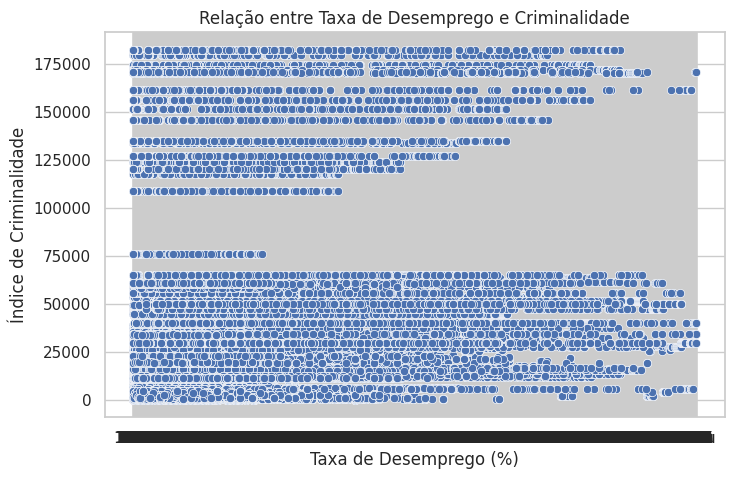

In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_final, x="UnemploymentRate", y="CrimeIndex")
plt.title("Relação entre Taxa de Desemprego e Criminalidade")
plt.xlabel("Taxa de Desemprego (%)")
plt.ylabel("Índice de Criminalidade")
plt.grid(True)
plt.show()

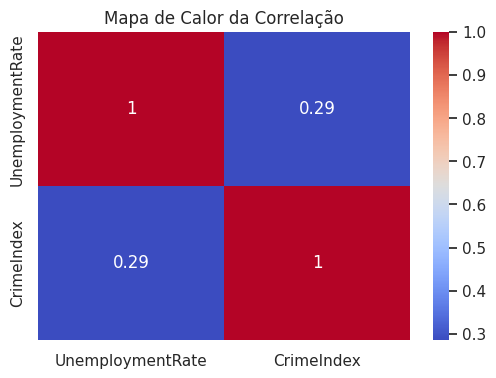

In [30]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr[["UnemploymentRate", "CrimeIndex"]].corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Calor da Correlação")
plt.show()


In [ ]:
!git init
!git remote add origin https://github.com/pnovato/data_analysis_of_crime_unemployment_europe.git
!git add .
!git commit -m "Versão inicial do projeto em português e inglês"
!git branch -M main
!git push -u origin main



Reinitialized existing Git repository in /home/ptrck/UFP/terceiro_ano/AD/Projeto_AD/.git/
error: remote origin already exists.
[main 4fbcf5f] Versão inicial do projeto em português e inglês
 1 file changed, 8 deletions(-)
Username for 'https://github.com': 

In [ ]:
pnovato